In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure
from sklearn.metrics import accuracy_score

from warnings import filterwarnings

In [ ]:
df=pd.read_csv("Crop_recommendation.csv")

In [ ]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [ ]:
df=df.dropna(axis=1)

In [ ]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].values
X_test = test[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].values
y_train = train['label']
y_test = test['label']

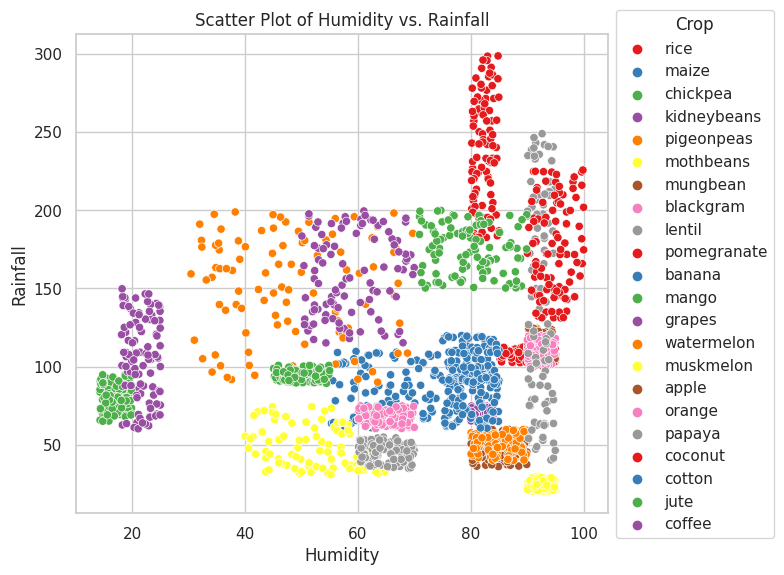

In [ ]:
X = df[['humidity', 'rainfall']].values
y = df['label']

# Scatter Plot for Humidity vs. Rainfall
plt.figure(figsize=(8, 6))
scatter_humidity_rainfall = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1")
plt.title("Scatter Plot of Humidity vs. Rainfall")
plt.xlabel("Humidity")
plt.ylabel("Rainfall")
handles, labels = scatter_humidity_rainfall.get_legend_handles_labels()
scatter_humidity_rainfall.legend(handles, labels, title="Crop", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Figure 1: Scatter Plot of Humidity vs. Rainfall.png', dpi=300)

plt.show()

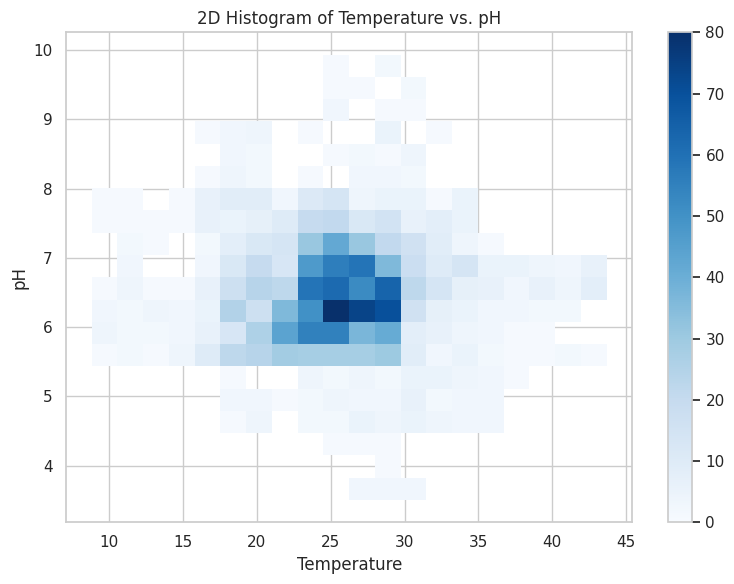

In [ ]:
# Create a 2D histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(x=df['temperature'], y=df['ph'], bins=20, cmap='Blues', cbar=True)
plt.xlabel('Temperature')
plt.ylabel('pH')
plt.title('2D Histogram of Temperature vs. pH')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Figure 2: histogram_plot.png', dpi=300)

plt.show()



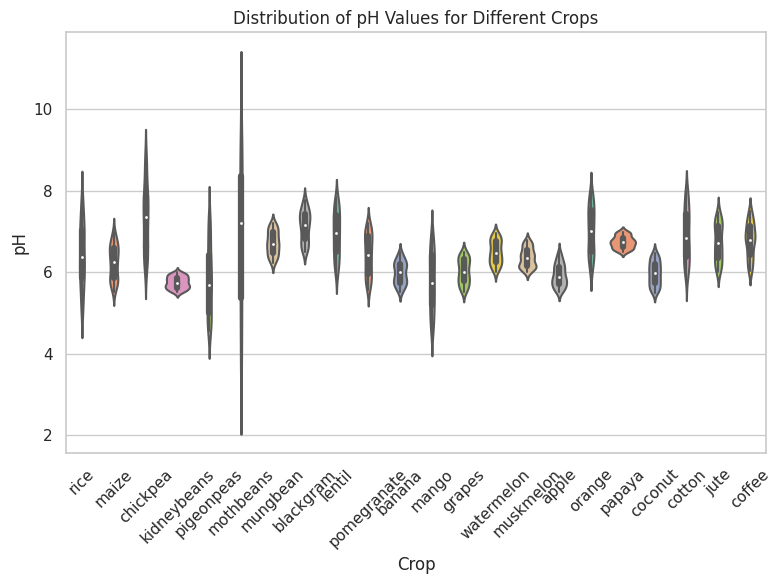

In [ ]:
# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='label', y='ph', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Crop')
plt.ylabel('pH')
plt.title('Distribution of pH Values for Different Crops')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Figure 3: pH_distribution_by_crop.png', dpi=300)

plt.show()


<ipython-input-48-cf96cee71aaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


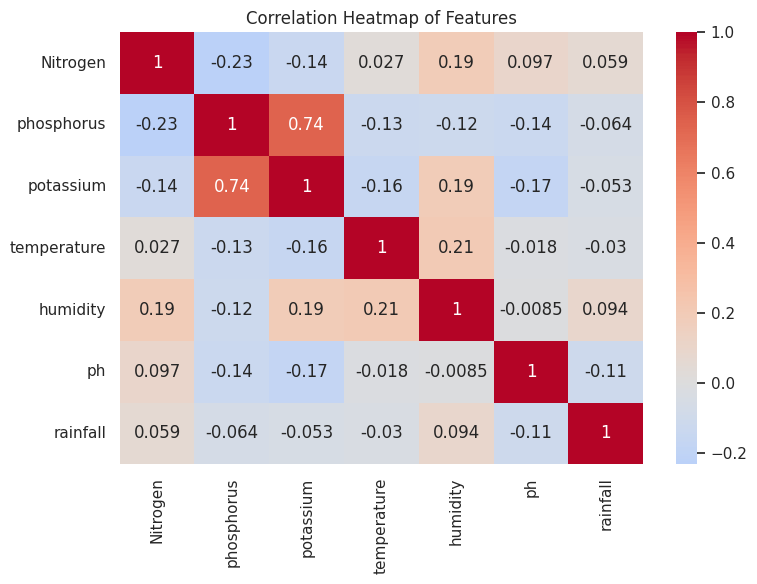

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()

# Save the heatmap as a PNG file
plt.savefig('Figure 4: feature_correlation_heatmap.png', dpi=300)

plt.show()
